In [1]:
%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge, LogisticRegressionCV, LogisticRegression
from sklearn.decomposition import PCA
from sklearn import preprocessing
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import seaborn as sns
from mord import LogisticIT
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

# Part 1

In [2]:
bathSoap_df = pd.read_csv('BathSoapHousehold.csv')
bathSoap_df.set_index('Member id', inplace=True)

bathSoap_df.head()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4,3,10,1,4,4,2,4,1,2,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1010020,3,2,10,2,2,4,4,2,1,19,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
1014020,2,3,10,2,4,5,6,4,1,23,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
1014030,4,0,0,0,4,0,0,5,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
1014190,4,1,10,2,3,4,4,3,1,10,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [3]:
#Performing Descriptive statistics

bathSoap_df.describe()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2.500000,2.048333,8.178333,1.738333,3.213333,4.043333,4.086667,3.233333,0.931667,17.02000,...,0.092324,0.096909,0.080148,0.030806,0.020248,0.029367,0.006217,0.024938,0.136481,0.025398
std,1.118967,1.134964,4.294641,0.648510,0.865489,2.190004,2.118167,1.217110,0.507372,11.41008,...,0.166330,0.195760,0.152564,0.062816,0.076657,0.098467,0.026312,0.095448,0.266045,0.087592
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,1.000000,4.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,10.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000,3.000000,10.000000,2.000000,3.000000,4.500000,4.000000,4.000000,1.000000,15.00000,...,0.020155,0.012601,0.007750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.250000,3.000000,10.000000,2.000000,4.000000,5.000000,5.000000,4.000000,1.000000,24.00000,...,0.103679,0.082935,0.086341,0.031645,0.000000,0.007739,0.000000,0.005522,0.118416,0.000000
max,4.000000,3.000000,19.000000,2.000000,4.000000,9.000000,10.000000,5.000000,2.000000,53.00000,...,0.971098,1.000000,0.963636,0.407643,1.000000,0.897507,0.333333,1.000000,1.000000,0.840194


In [4]:
bathSoap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1010010 to 1167670
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SEC                    600 non-null    int64  
 1   FEH                    600 non-null    int64  
 2   MT                     600 non-null    int64  
 3   SEX                    600 non-null    int64  
 4   AGE                    600 non-null    int64  
 5   EDU                    600 non-null    int64  
 6   HS                     600 non-null    int64  
 7   CHILD                  600 non-null    int64  
 8   CS                     600 non-null    int64  
 9   Affluence Index        600 non-null    int64  
 10  No. of Brands          600 non-null    int64  
 11  Brand Runs             600 non-null    int64  
 12  Total Volume           600 non-null    int64  
 13  No. of  Trans          600 non-null    int64  
 14  Value                  600 non-null    float64
 

In [5]:
print(bathSoap_df.isna().sum())

SEC                      0
FEH                      0
MT                       0
SEX                      0
AGE                      0
EDU                      0
HS                       0
CHILD                    0
CS                       0
Affluence Index          0
No. of Brands            0
Brand Runs               0
Total Volume             0
No. of  Trans            0
Value                    0
Trans / Brand Runs       0
Vol/Tran                 0
Avg. Price               0
Pur Vol No Promo - %     0
Pur Vol Promo 6 %        0
Pur Vol Other Promo %    0
Br. Cd. 57, 144          0
Br. Cd. 55               0
Br. Cd. 272              0
Br. Cd. 286              0
Br. Cd. 24               0
Br. Cd. 481              0
Br. Cd. 352              0
Br. Cd. 5                0
Others 999               0
Pr Cat 1                 0
Pr Cat 2                 0
Pr Cat 3                 0
Pr Cat 4                 0
PropCat 5                0
PropCat 6                0
PropCat 7                0
P

In [6]:
demographicIndicators = bathSoap_df.columns[1:11]
purchaseIndicator = bathSoap_df.columns[11:19]
withinPromotionIndicator = bathSoap_df.columns[19:22]
brandIndicator = bathSoap_df.columns[22:30]
otherBrandIndicator = bathSoap_df.columns[30:31]
priceCategoryIndicator = bathSoap_df.columns[31:35]
sellingPropertyIndicator = bathSoap_df.columns[35:46]

In [7]:
bathSoap_df['maxBrandIndicator'] = bathSoap_df[brandIndicator].max(axis=1)

In [8]:
behaviorIndicator = list(purchaseIndicator) + list(otherBrandIndicator) + ['maxBrandIndicator']

In [9]:
purchaseBasisIndicator = list(withinPromotionIndicator) + list(priceCategoryIndicator)
purchaseBasisIndicator.extend(['PropCat 5', 'PropCat 14'])

In [10]:
combinedIndicator = behaviorIndicator + purchaseBasisIndicator

In [11]:
#d_norm = pairwise.pairwise_distances(bathSoap_df[combinedIndicator], 
                                    # metric='euclidean')
#pd.DataFrame(d_norm, columns=bathSoap_df.index, index=bathSoap_df.index).head(5)
df1 = bathSoap_df[demographicIndicators]
df2 = bathSoap_df[combinedIndicator]


In [12]:
d_norm = df2.apply(preprocessing.scale, axis=0)

Using K = 2

In [13]:
def clusterSizes(kmeans):
 return pd.Series(kmeans.labels_).value_counts().sort_index()
def clusterCenters(kmeans, indicator):
 return d_norm[indicator].groupby(kmeans.labels_).mean()

kmeans = KMeans(n_clusters=2, random_state=0).fit(d_norm)
clusterCenters(kmeans, combinedIndicator).transpose()


,0,1
Brand Runs,-0.717989,0.102570
Total Volume,0.154703,-0.022100
No. of Trans,-0.361804,0.051686
Value,-0.492443,0.070349
Trans / Brand Runs,0.952855,-0.136122
Vol/Tran,0.507382,-0.072483
Avg. Price,-1.305713,0.186530
Pur Vol No Promo - %,0.248633,-0.035519
Pr Cat 1,-0.812295,0.116042
maxBrandIndicator,0.511350,-0.073050


In [14]:
def clusterDemographics(kmeans):
 return bathSoap_df[demographicIndicators].groupby(kmeans.labels_).mean()
clusterDemographics(kmeans)

,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,No. of Brands
0,2.066667,7.680000,1.546667,3.026667,2.36000,3.933333,3.506667,0.866667,8.640000,2.893333
1,2.045714,8.249524,1.765714,3.240000,4.28381,4.108571,3.194286,0.940952,18.217143,3.742857


In [15]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=d_norm.columns)
pd.set_option('precision', 3)

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pr Cat 1,maxBrandIndicator,Pur Vol Promo 6 %,Pur Vol Other Promo %,"Br. Cd. 57, 144",Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 5,PropCat 14,cluster
0,-0.718,0.155,-0.362,-0.492,0.953,0.507,-1.306,0.249,-0.812,0.511,-0.417,0.125,-0.582,-1.138,2.413,-0.333,-1.143,-1.143,2.417,Cluster 0
1,0.103,-0.022,0.052,0.070,-0.136,-0.072,0.187,-0.036,0.116,-0.073,0.060,-0.018,0.083,0.163,-0.345,0.048,0.163,0.163,-0.345,Cluster 1


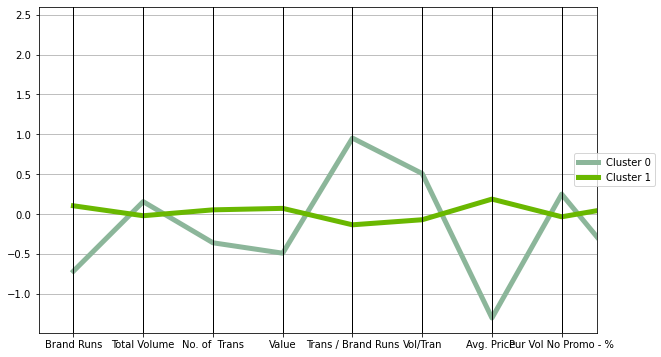

In [16]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
#fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [17]:
# calculate the distances of each data point to the cluster centers
#distances = kmeans.transform(d_norm)

# find closest cluster for each data point
#minSquaredDistances = distances.min(axis=1)**2

# combine with cluster labels into a data frame
#df = pd.DataFrame(minSquaredDistances, kmeans.labels_, columns =['squaredDistance', 'cluster'])

# group by cluster and print information
#for cluster, data in df.groupby('cluster'):
#    count = len(data)
#withinClustSS = data.squaredDistance.sum()
#print(f'Cluster cluster (count members): withinClustSS:.2f within cluster')

Using K = 3 

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(d_norm)
clusterCenters(kmeans, combinedIndicator).transpose()

,0,1,2
Brand Runs,-0.275,0.387,-0.750
Total Volume,0.163,-0.150,0.125
No. of Trans,-0.242,0.275,-0.394
Value,0.081,0.068,-0.514
Trans / Brand Runs,-0.082,-0.176,0.953
Vol/Tran,0.369,-0.395,0.503
Avg. Price,-0.227,0.489,-1.304
Pur Vol No Promo - %,0.292,-0.277,0.255
Pr Cat 1,-0.443,0.526,-0.814
maxBrandIndicator,-0.586,0.305,0.505


In [19]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=d_norm.columns)
pd.set_option('precision', 3)

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pr Cat 1,maxBrandIndicator,Pur Vol Promo 6 %,Pur Vol Other Promo %,"Br. Cd. 57, 144",Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 5,PropCat 14,cluster
0,-0.275,0.163,-0.242,0.081,-0.082,0.369,-0.227,0.292,-0.443,-0.586,-0.316,-0.076,0.760,0.537,-0.328,0.236,0.941,0.941,-0.328,Cluster 0
1,0.387,-0.150,0.275,0.068,-0.176,-0.395,0.489,-0.277,0.526,0.305,0.335,0.027,-0.414,-0.113,-0.355,-0.090,-0.407,-0.407,-0.356,Cluster 1
2,-0.750,0.125,-0.394,-0.514,0.953,0.503,-1.304,0.255,-0.814,0.505,-0.419,0.118,-0.574,-1.131,2.406,-0.333,-1.142,-1.142,2.410,Cluster 2


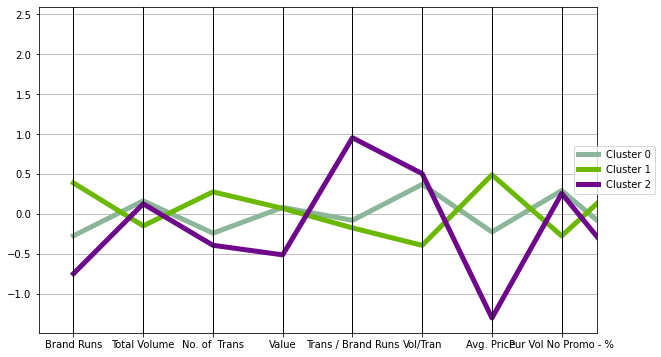

In [20]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
ax = parallel_coordinates(centroids, class_column='cluster', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pr Cat 1,maxBrandIndicator,Pur Vol Promo 6 %,Pur Vol Other Promo %,"Br. Cd. 57, 144",Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 5,PropCat 14,cluster
0,-0.763,0.092,-0.409,-0.536,0.964,0.477,-1.294,0.264,-0.798,0.519,-0.478,0.180,-0.563,-1.128,2.417,-0.378,-1.150,-1.150,2.421,Cluster 0
1,0.398,-0.128,0.303,0.125,-0.159,-0.384,0.567,-0.135,0.568,0.270,0.195,-0.028,-0.407,-0.021,-0.366,-0.285,-0.491,-0.491,-0.363,Cluster 1
2,-0.200,0.167,-0.196,-0.232,-0.101,0.354,-0.777,-0.572,-0.501,0.729,0.690,0.059,-0.553,-0.914,-0.177,2.467,0.798,0.798,-0.198,Cluster 2
3,-0.228,0.099,-0.228,0.107,-0.113,0.269,-0.069,0.300,-0.368,-0.876,-0.346,-0.051,1.042,0.808,-0.358,-0.275,0.934,0.934,-0.357,Cluster 3


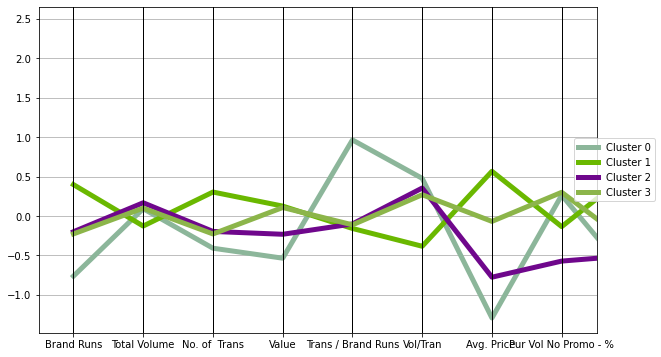

In [21]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(d_norm)
clusterCenters(kmeans, combinedIndicator).transpose()
labels = kmeans.labels_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=d_norm.columns)
pd.set_option('precision', 3)
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize=(10,6))
ax = parallel_coordinates(centroids, class_column='cluster', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
centroids

In [22]:
def clusterDemographics(kmeans):
    return bathSoap_df[demographicIndicators].groupby(kmeans.labels_).mean()
clusterDemographics(kmeans).transpose()

,0,1,2,3
FEH,2.027,2.032,2.312,1.989
MT,7.581,8.283,9.141,7.923
SEX,1.541,1.763,1.812,1.754
AGE,3.041,3.276,3.219,3.186
EDU,2.338,4.624,3.359,4.087
HS,3.865,4.079,4.500,4.044
CHILD,3.554,3.204,3.156,3.175
CS,0.865,0.928,1.109,0.902
Affluence Index,8.459,20.548,13.453,16.350
No. of Brands,2.905,4.072,2.875,3.536


# Part 2

In [23]:
modelData_df = bathSoap_df[demographicIndicators].copy()
modelData_df = pd.get_dummies(modelData_df, columns=['MT', 'FEH'])
modelData_df['y'] = [1 if label == 1 else 0 for label in kmeans.labels_]

In [24]:
modelData_df.columns

Index(['SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index',
       'No. of Brands', 'MT_0', 'MT_3', 'MT_4', 'MT_5', 'MT_6', 'MT_8', 'MT_9',
       'MT_10', 'MT_12', 'MT_13', 'MT_14', 'MT_15', 'MT_16', 'MT_17', 'MT_19',
       'FEH_0', 'FEH_1', 'FEH_2', 'FEH_3', 'y'],
      dtype='object')

In [25]:
#modelData_df = modelData_df.groupby('y', group_keys=False).apply(lambda x: x.sample(frac=0.6))


In [34]:
y = modelData_df['y']
X = modelData_df[['SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index',
       'No. of Brands', 'MT_0', 'MT_3', 'MT_4', 'MT_5', 'MT_6', 'MT_8', 'MT_9',
       'MT_10', 'MT_12', 'MT_13', 'MT_14', 'MT_15', 'MT_16', 'MT_17', 'MT_19',
       'FEH_0', 'FEH_1', 'FEH_2', 'FEH_3']]
             
# TRAINING AND VALIDATION - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.6, random_state=1)

In [35]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [36]:
print('intercept ', logit_reg.intercept_[0].round(2))
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = 
   len(train_X.columns) + 1).round(3))
print(" ")
print(pd.DataFrame({'coeff': logit_reg.coef_[0], 'Odds': np.exp(logit_reg.coef_[0])}, index=X.columns))

intercept  -0.31
AIC 747.262
 
                 coeff      Odds
SEX             -1.489     0.226
AGE              0.408     1.504
EDU              0.394     1.483
HS               0.051     1.052
CHILD           -0.472     0.624
CS              -1.313     0.269
Affluence Index  0.081     1.085
No. of Brands    0.364     1.439
MT_0             0.226     1.253
MT_3             0.000     1.000
MT_4            -0.694     0.500
MT_5            -0.256     0.774
MT_6             0.156     1.168
MT_8             7.969  2890.088
MT_9            -3.358     0.035
MT_10           -0.001     0.999
MT_12           -1.838     0.159
MT_13            1.386     4.000
MT_14            0.000     1.000
MT_15            0.936     2.548
MT_16            0.756     2.129
MT_17            0.080     1.084
MT_19           -5.673     0.003
FEH_0            0.226     1.253
FEH_1           -0.691     0.501
FEH_2            0.345     1.412
FEH_3           -0.191     0.826


In [37]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
Member id,,,,
1148150,0,0.355,0.645,1
1145380,1,0.576,0.424,0
1156970,1,0.694,0.306,0
1150100,0,0.332,0.668,1
1077300,0,0.708,0.292,0
...,...,...,...,...
1081490,0,0.923,0.077,0
1080570,0,0.789,0.211,0
1155080,1,0.399,0.601,1


In [38]:
logit_result.loc[logit_result['actual'] != logit_result['predicted']] 

,actual,p(0),p(1),predicted
Member id,,,,
1148150,0,0.355,0.645,1
1145380,1,0.576,0.424,0
1156970,1,0.694,0.306,0
1150100,0,0.332,0.668,1
1027160,0,0.475,0.525,1
...,...,...,...,...
1140500,1,0.974,0.026,0
1070500,1,0.590,0.410,0
1156840,0,0.475,0.525,1


In [39]:
classificationSummary(train_y, logit_reg.predict(train_X))
print(" ")
print(" ")
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.7167)

       Prediction
Actual  0  1
     0 95 30
     1 38 77
 
 
Confusion Matrix (Accuracy 0.6028)

       Prediction
Actual   0   1
     0 125  71
     1  72  92
